In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("data_modified.csv")
df

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,EDA_Functionals_power_Filt2kurtosis.1,EDA_Functionals_power_Filt2max.1,EDA_Functionals_power_Filt2min.1,EDA_Functionals_power_Filt2prctile25.1,EDA_Functionals_power_Filt2prctile75.1,EDA_Functionals_power_Filt2geomean(abs).1,EDA_Functionals_power_Filt2harmmean.1,EDA_Functionals_power_Filt2mad.1,EDA_Functionals_power_Filt2baseline.1,Activity
0,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,0.10763,...,1015.36,7.170000e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1410000.0,3030000.0,1
1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,0.11163,...,1015.78,7.060000e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390000.0,3020000.0,1
2,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,0.08863,...,1016.16,6.270000e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1230000.0,3000000.0,1
3,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,0.07163,...,1015.61,5.600000e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1100000.0,2990000.0,1
4,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,0.07163,...,1015.67,4.840000e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2980000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,0.12299,...,1014.61,3.240000e+09,0.132094,9.48535,73.9901,31.82590,5.16972,6390000.0,398810.0,4
4476,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,0.11899,...,1016.07,3.160000e+09,0.133406,8.73701,68.4041,29.83820,5.06743,6210000.0,412407.0,4
4477,0.024672,0.213325,0.014418,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,0.13699,...,1016.06,3.050000e+09,0.138525,8.90410,68.5051,30.45150,5.88492,6010000.0,425422.0,4
4478,0.025063,0.212210,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,0.13299,...,1015.80,3.320000e+09,0.076570,8.97766,72.4431,30.38700,4.43563,6540000.0,439695.0,4


#### Map dos tipos de atividades

In [3]:
Activity_mapping = {
 1: 'neutral',
 2: 'emotional',
 3: 'mental',
 4: 'physical'
}
df['Activity'] = df['Activity'].map(Activity_mapping)
df

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,EDA_Functionals_power_Filt2kurtosis.1,EDA_Functionals_power_Filt2max.1,EDA_Functionals_power_Filt2min.1,EDA_Functionals_power_Filt2prctile25.1,EDA_Functionals_power_Filt2prctile75.1,EDA_Functionals_power_Filt2geomean(abs).1,EDA_Functionals_power_Filt2harmmean.1,EDA_Functionals_power_Filt2mad.1,EDA_Functionals_power_Filt2baseline.1,Activity
0,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,0.10763,...,1015.36,7.170000e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1410000.0,3030000.0,neutral
1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,0.11163,...,1015.78,7.060000e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390000.0,3020000.0,neutral
2,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,0.08863,...,1016.16,6.270000e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1230000.0,3000000.0,neutral
3,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,0.07163,...,1015.61,5.600000e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1100000.0,2990000.0,neutral
4,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,0.07163,...,1015.67,4.840000e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2980000.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,0.12299,...,1014.61,3.240000e+09,0.132094,9.48535,73.9901,31.82590,5.16972,6390000.0,398810.0,physical
4476,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,0.11899,...,1016.07,3.160000e+09,0.133406,8.73701,68.4041,29.83820,5.06743,6210000.0,412407.0,physical
4477,0.024672,0.213325,0.014418,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,0.13699,...,1016.06,3.050000e+09,0.138525,8.90410,68.5051,30.45150,5.88492,6010000.0,425422.0,physical
4478,0.025063,0.212210,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,0.13299,...,1015.80,3.320000e+09,0.076570,8.97766,72.4431,30.38700,4.43563,6540000.0,439695.0,physical


#### Separação entre categorias de features (ECG-TEB-EDA)

In [4]:
df_ECG = df.filter(regex=("ECG_.*|Activity"))
df_TEB = df.filter(regex=("IT_.*|Activity"))
df_EDA = df.filter(regex=("EDA_.*|Activity"))
df_ECG_TEB = df.filter(regex=("(ECG_.*)|(IT_.*)|(Activity)"))
df_ECG_EDA = df.filter(regex=("(ECG_.*)|(EDA_.*)|(Activity)"))
df_TEB_EDA = df.filter(regex=("(IT_.*)|(EDA_.*)|(Activity)"))

#### Separar a classificação do resto da informação de cada instância

In [5]:
target_results = df[['Activity']]
target_results_ECG = df_ECG[['Activity']]
target_results_TEB = df_TEB[['Activity']]
target_results_EDA = df_EDA[['Activity']]
target_results_ECG_TEB = df_ECG_TEB[['Activity']]
target_results_ECG_EDA = df_ECG_EDA[['Activity']]
target_results_TEB_EDA = df_TEB_EDA[['Activity']]
target_results

,Activity
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
4475,physical
4476,physical
4477,physical
4478,physical


In [6]:
df = df.drop("Activity", axis=1)
df_ECG = df_ECG.drop("Activity", axis=1)
df_TEB = df_TEB.drop("Activity", axis=1)
df_EDA = df_EDA.drop("Activity", axis=1)
df_ECG_TEB = df_ECG_TEB.drop("Activity", axis=1)
df_ECG_EDA = df_ECG_EDA.drop("Activity", axis=1)
df_TEB_EDA = df_TEB_EDA.drop("Activity", axis=1)
df

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,EDA_Functionals_power_Filt2skewness.1,EDA_Functionals_power_Filt2kurtosis.1,EDA_Functionals_power_Filt2max.1,EDA_Functionals_power_Filt2min.1,EDA_Functionals_power_Filt2prctile25.1,EDA_Functionals_power_Filt2prctile75.1,EDA_Functionals_power_Filt2geomean(abs).1,EDA_Functionals_power_Filt2harmmean.1,EDA_Functionals_power_Filt2mad.1,EDA_Functionals_power_Filt2baseline.1
0,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,0.10763,...,31.4249,1015.36,7.170000e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1410000.0,3030000.0
1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,0.11163,...,31.4354,1015.78,7.060000e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390000.0,3020000.0
2,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,0.08863,...,31.4480,1016.16,6.270000e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1230000.0,3000000.0
3,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,0.07163,...,31.4333,1015.61,5.600000e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1100000.0,2990000.0
4,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,0.07163,...,31.4346,1015.67,4.840000e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2980000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,0.12299,...,31.4079,1014.61,3.240000e+09,0.132094,9.48535,73.9901,31.82590,5.16972,6390000.0,398810.0
4476,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,0.11899,...,31.4447,1016.07,3.160000e+09,0.133406,8.73701,68.4041,29.83820,5.06743,6210000.0,412407.0
4477,0.024672,0.213325,0.014418,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,0.13699,...,31.4487,1016.06,3.050000e+09,0.138525,8.90410,68.5051,30.45150,5.88492,6010000.0,425422.0
4478,0.025063,0.212210,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,0.13299,...,31.4353,1015.80,3.320000e+09,0.076570,8.97766,72.4431,30.38700,4.43563,6540000.0,439695.0


#### Separação em dados de treino e teste

In [7]:
data_train, data_test, target_train, target_test  = train_test_split( df, target_results, test_size=0.3, random_state=0)
data_train_ECG, data_test_ECG, target_train_ECG, target_test_ECG = train_test_split( df_ECG, target_results_ECG, test_size=0.3, random_state=0)
data_train_TEB, data_test_TEB, target_train_TEB, target_test_TEB = train_test_split( df_TEB, target_results_TEB, test_size=0.3, random_state=0)
data_train_EDA, data_test_EDA, target_train_EDA, target_test_EDA = train_test_split( df_EDA, target_results_EDA, test_size=0.3, random_state=0)
data_train_ECG_TEB, data_test_ECG_TEB, target_train_ECG_TEB, target_test_ECG_TEB = train_test_split( df_ECG_TEB, target_results_ECG_TEB, test_size=0.3, random_state=0)
data_train_ECG_EDA, data_test_ECG_EDA, target_train_ECG_EDA, target_test_ECG_EDA = train_test_split( df_ECG_EDA, target_results_ECG_EDA, test_size=0.3, random_state=0)
data_train_TEB_EDA, data_test_TEB_EDA, target_train_TEB_EDA, target_test_TEB_EDA = train_test_split( df_TEB_EDA, target_results_TEB_EDA, test_size=0.3, random_state=0)


#### Normalização

In [8]:
sc = StandardScaler()

data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)
data_train_ECG = sc.fit_transform(data_train_ECG)
data_test_ECG = sc.transform(data_test_ECG)
data_train_TEB = sc.fit_transform(data_train_TEB)
data_test_TEB = sc.transform(data_test_TEB)
data_train_EDA = sc.fit_transform(data_train_EDA)
data_test_EDA = sc.transform(data_test_EDA)
data_train_ECG_TEB = sc.fit_transform(data_train_ECG_TEB)
data_test_ECG_TEB = sc.transform(data_test_ECG_TEB)
data_train_ECG_EDA = sc.fit_transform(data_train_ECG_EDA)
data_test_ECG_EDA = sc.transform(data_test_ECG_EDA)
data_train_TEB_EDA = sc.fit_transform(data_train_TEB_EDA)
data_test_TEB_EDA = sc.transform(data_test_TEB_EDA)

data_train

array([[-0.19227957,  1.43622831, -0.4731104 , ..., -0.22252848,
        -0.42272889, -0.020283  ],
       [-0.17181492, -0.52404358, -0.13209733, ..., -0.42294291,
        -0.49258381, -0.4135639 ],
       [-0.15752504, -0.57019399, -0.15434728, ..., -0.57532121,
        -0.5109097 , -0.46715195],
       ...,
       [-0.15979322, -0.50665046, -0.15701476, ..., -0.52757386,
        -0.508634  , -0.46482558],
       [-0.1714839 , -0.41477444, -0.14030513, ..., -0.42743017,
        -0.44120664, -0.43914572],
       [-0.1482898 , -0.48586882, -0.15210654, ...,  1.77846022,
         1.98283397,  3.50788676]])

#### Seleção de features ECG-TEB-EDA

In [9]:
forest = RandomForestClassifier(max_features=None, oob_score=True)
forest


RandomForestClassifier(max_features=None, oob_score=True)

In [10]:
forest.fit(data_train, np.ravel(target_train))

RandomForestClassifier(max_features=None, oob_score=True)

##### As features mais importantes (ECG-TEB-EDA)

<AxesSubplot:>

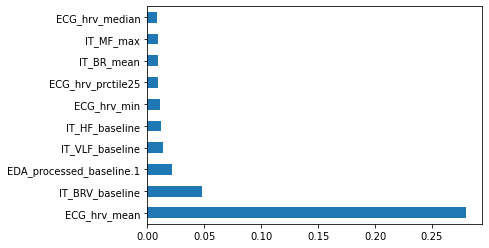

In [11]:
feat_importances = pd.Series(forest.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [12]:
feat_importances.nlargest(10)

ECG_hrv_mean                0.279969
IT_BRV_baseline             0.047596
EDA_processed_baseline.1    0.021741
IT_VLF_baseline             0.013475
IT_HF_baseline              0.011696
ECG_hrv_min                 0.011087
ECG_hrv_prctile25           0.009757
IT_BR_mean                  0.009145
IT_MF_max                   0.008984
ECG_hrv_median              0.008396
dtype: float64

#### Outras combinações de features

In [14]:
forest_ECG = RandomForestClassifier(max_features=None, oob_score=True)
forest_TEB = RandomForestClassifier(max_features=None, oob_score=True)
forest_EDA = RandomForestClassifier(max_features=None, oob_score=True)
forest_ECG_TEB = RandomForestClassifier(max_features=None, oob_score=True)
forest_ECG_EDA = RandomForestClassifier(max_features=None, oob_score=True)
forest_TEB_EDA = RandomForestClassifier(max_features=None, oob_score=True)

forest_ECG.fit(data_train_ECG, np.ravel(target_train_ECG))
forest_TEB.fit(data_train_TEB, np.ravel(target_train_TEB))
forest_EDA.fit(data_train_EDA, np.ravel(target_train_EDA))
forest_ECG_TEB.fit(data_train_ECG_TEB, np.ravel(target_train_ECG_TEB))
forest_ECG_EDA.fit(data_train_ECG_EDA, np.ravel(target_train_ECG_EDA))
forest_TEB_EDA.fit(data_train_TEB_EDA, np.ravel(target_train_TEB_EDA))


RandomForestClassifier(max_features=None, oob_score=True)

<AxesSubplot:>

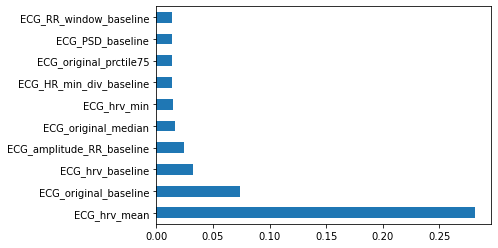

In [15]:
feat_importances_ECG = pd.Series(forest_ECG.feature_importances_, index=df_ECG.columns)
feat_importances_ECG.nlargest(10).plot(kind='barh')

<AxesSubplot:>

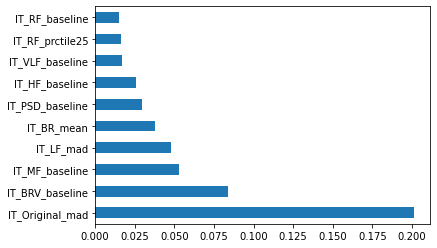

In [16]:
feat_importances_TEB = pd.Series(forest_TEB.feature_importances_, index=df_TEB.columns)
feat_importances_TEB.nlargest(10).plot(kind='barh')

<AxesSubplot:>

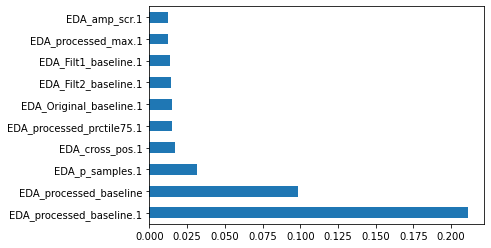

In [17]:
feat_importances_EDA = pd.Series(forest_EDA.feature_importances_, index=df_EDA.columns)
feat_importances_EDA.nlargest(10).plot(kind='barh')

<AxesSubplot:>

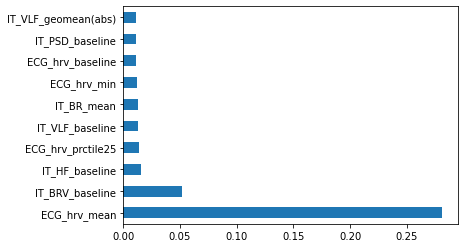

In [18]:
feat_importances_ECG_TEB = pd.Series(forest_ECG_TEB.feature_importances_, index=df_ECG_TEB.columns)
feat_importances_ECG_TEB.nlargest(10).plot(kind='barh')

<AxesSubplot:>

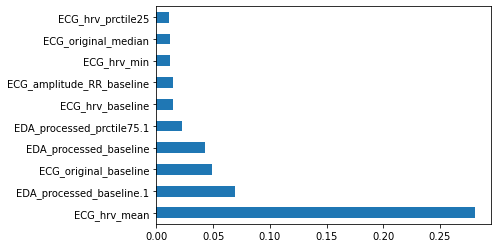

In [19]:
feat_importances_ECG_EDA = pd.Series(forest_ECG_EDA.feature_importances_, index=df_ECG_EDA.columns)
feat_importances_ECG_EDA.nlargest(10).plot(kind='barh')

<AxesSubplot:>

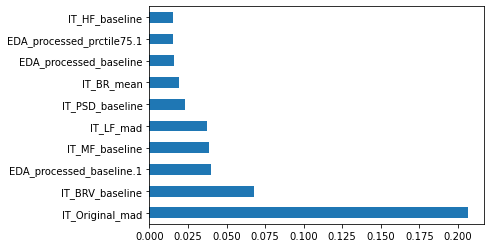

In [20]:
feat_importances_TEB_EDA = pd.Series(forest_TEB_EDA.feature_importances_, index=df_TEB_EDA.columns)
feat_importances_TEB_EDA.nlargest(10).plot(kind='barh')